# $l_p$-norm penalty analysis

Reference: Boyd, Stephen, and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004.

In [0]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [0]:
# generate data
n, m = 100, 30
A = np.random.rand(n, m)
b = np.random.rand(n, 1)

## $l_2$-norm solution

$$x = (A^TA)^{-1}A^Tb$$

In [0]:
# l2-norm solution
x_l2 = np.dot(np.linalg.pinv(A), b)

## $l_1$-norm solution

The following problem:
$$\min_x \sum_{i=1}^n |a_i^Tx - b_i|,$$

converts to a linear programming optimization in the form: 

In [34]:
%%latex
\begin{align}
\min_{x,t}&\quad 1^Tt\\
\text{subject to}&\quad Ax - t \leq b\\
&-Ax - t \leq -b\\
\quad\quad &t \geq 0, t \in \mathbb{R}^n
\end{align}

<IPython.core.display.Latex object>

In [0]:
# l1-norm solution: optimization parameters

# inequality contraint matrix
A_ub1 = np.c_[A, -np.eye(n)]
A_ub2 = np.c_[-A, -np.eye(n)]
A_ub = np.r_[A_ub1, A_ub2]

# inequality contraint bounds
b_ub = np.r_[b, -b]

# linear objective coefficients
c = np.ones((A_ub.shape[1], 1))
c[0:m] = 0

# bounds
x_bounds = np.c_[-np.inf*np.ones((m+n, 1)), np.inf*np.ones((m+n, 1))]
x_bounds[m:, 0] = 0

In [0]:
# solve linear progam
output = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds)

In [0]:
# optimization result
x_l1 = output.x[:m].reshape(-1, 1)

In [0]:
# errors
l1_error = np.dot(A, x_l1) - b
l2_error = np.dot(A, x_l2) - b

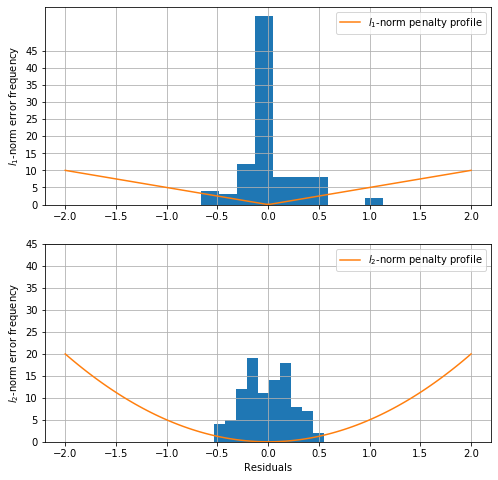

In [177]:
# plot
grid = np.linspace(-2, 2, 100)
scale_factor = 5

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
ax1.hist(l1_error)
ax1.plot(grid, scale_factor*np.abs(grid), label='$l_1$-norm penalty profile')
ax1.set_ylabel('$l_1$-norm error frequency')
ax1.set_yticks(np.arange(0, 50, 5))
ax1.legend()
ax1.grid()

ax2 = plt.subplot(212, sharex=ax1)
ax2.hist(l2_error)
ax2.plot(grid, scale_factor*grid**2, label='$l_2$-norm penalty profile')
ax2.set_xlabel("Residuals")
ax2.set_ylabel('$l_2$-norm error frequency')
ax2.set_yticks(np.arange(0, 50, 5))
ax2.legend()
ax2.grid()
plt.show()

## Conclusions

- $l_1$-norm penalty puts the most weight on small residuals and the least weight on large residuals: it finds the hyperplane that passes through the median of residuals. Thus, being more robust to extreme values;
- $l_2$-norm penalty puts very small weight on small residuals, but strong weight on large residuals: it finds the hyperplane that passes through the mean of residuals. Thus, being more sensitive to extreme values.